In [176]:
# Import utiliies and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### EDA

#### Price CSV

In [177]:
# Read price data from the CSV file
df_price = pd.read_csv('data/price.csv')
df_price.head()

,date,ticker,open,high,low,close,volume
0,2023-11-13,AAPL,185.820007,186.029999,184.210007,184.800003,43627500
1,2023-11-14,AAPL,187.699997,188.110001,186.300003,187.440002,60108400
2,2023-11-15,AAPL,187.850006,189.500000,187.779999,188.009995,53790500
3,2023-11-16,AAPL,189.570007,190.960007,188.649994,189.710007,54412900
4,2023-11-17,AAPL,190.250000,190.380005,188.570007,189.690002,50922700


In [178]:
# Get data types of the price df
df_price.dtypes

date       object
ticker     object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [179]:
df_price.describe()

,open,high,low,close,volume
count,1687.000000,1687.000000,1687.000000,1687.000000,1.687000e+03
mean,245.203879,248.029241,242.278194,245.264770,9.613876e+07
std,134.583166,135.776406,133.247946,134.540129,1.442287e+08
min,45.466000,46.077000,45.009998,45.502998,5.467500e+06
25%,158.190002,160.525002,156.540001,159.059998,2.076580e+07
50%,187.360001,189.279999,185.419998,187.429993,3.934310e+07
75%,371.489990,374.440002,368.845001,372.860001,8.306055e+07
max,598.219971,602.950012,589.960022,595.940002,1.142269e+09


In [180]:
# Check for duplicates. None in this case.
# df_price.duplicated().any()

In [181]:
# Check for null values. None in this case.
df_price.isnull().any()

date      False
ticker    False
open      False
high      False
low       False
close     False
volume    False
dtype: bool

#### Time Series of Prices (Date vs Close)

Text(0.5, 1.0, 'Stock Closing Price Over Time')

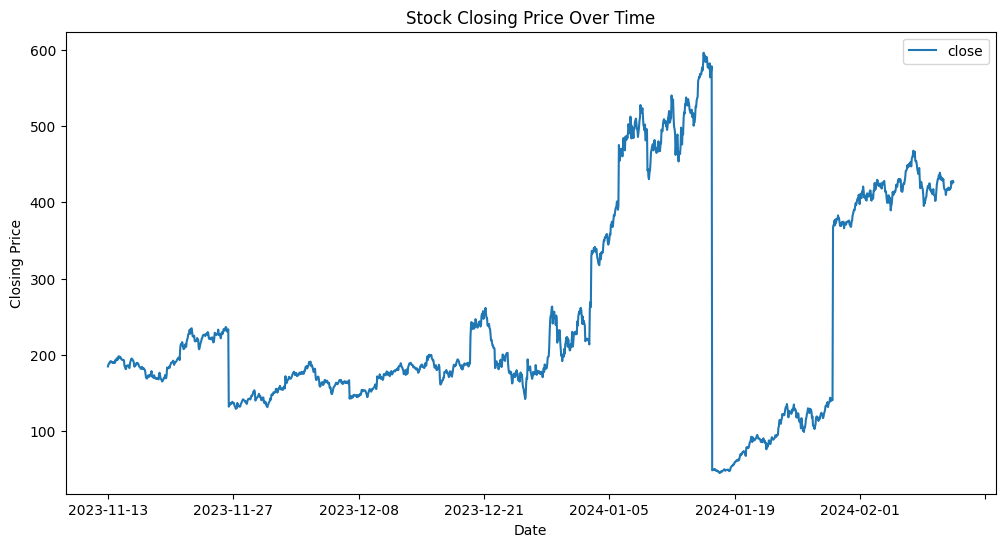

In [182]:
# Plot a graph to visualize the stock price over time
df_price.plot(x='date', y='close', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Closing Price Over Time')

From November 2023 to early January 2024, the stock price rises strongly, peaking near 590. Then, there is a sharp drop in mid-January, followed by sudden jumps (gaps) later in the month. Since early February, the price has moved more steadily in the 400–450 range. Te chart shows strong growth at first, a massive drop, high volatility, and sharp movements that may need further review.

In [183]:
df_price['return'] = df_price['close'].pct_change()

df_price = df_price.dropna(subset=['return'])
df_price.head(3)

,date,ticker,open,high,low,close,volume,return
1,2023-11-14,AAPL,187.699997,188.110001,186.300003,187.440002,60108400,0.014286
2,2023-11-15,AAPL,187.850006,189.500000,187.779999,188.009995,53790500,0.003041
3,2023-11-16,AAPL,189.570007,190.960007,188.649994,189.710007,54412900,0.009042


Text(0.5, 1.0, 'Stock Closing Price Over Time')

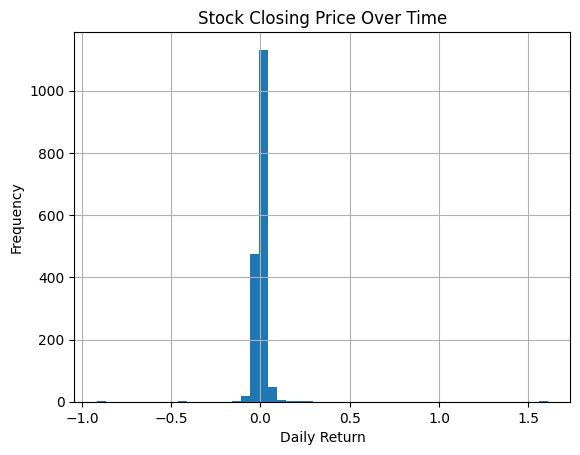

In [184]:
df_price['return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Stock Closing Price Over Time')


The histogram shows that most daily returns are very close to zero, meaning the stock usually moves only a small amount each day. The distribution is narrow and centered around zero, with very few extreme values on either side. This suggests that while there are occasional large moves, the majority of daily changes are small and stable.

#### News CSV

In [185]:
# Read news data from the CSV file
df_news = pd.read_csv('data/news.csv')
df_news.head()

,datetime,ticker,headline,summary
0,2024-10-29 18:07:48,AAPL,Apple Unveils the Redesigned Mac Mini,-- Apple overhauled the design of its Mac mini...
1,2024-10-29 02:21:10,AAPL,Apple blocked from selling iPhone 16 in Indone...,TECH giant Apple will not be allowed to sell i...
2,2024-10-28 14:05:22,AAPL,"Apple Rises on Apple Intelligence Rollout, New...",-- Apple unveiled its new iMac and said Apple ...
3,2024-10-28 12:05:04,AAPL,Apple : How Apple developed the world’s first ...,apple stories Inside the Audio Lab: How Apple ...
4,2024-10-28 11:02:06,AAPL,Apple launches the iPhone into the AI era with...,Apple is releasing a free software update that...


In [186]:
# Get data types of the news df. All are in object, or strings 
df_news.dtypes

datetime    object
ticker      object
headline    object
summary     object
dtype: object

In [187]:
df_news.describe()

,datetime,ticker,headline,summary
count,4440,4440,4440,4439
unique,4395,7,4214,4262
top,2024-06-24 03:40:00,AMZN,European regulators crack down on Big Tech,Editor's note: This post is part of the AI Dec...
freq,4,941,8,6


In [188]:
# Check for duplicates. There are some duplicates in the news data.
df_news.duplicated().any()

# Display the duplicated rows
df_news[df_news.duplicated()]

# Remove duplicates from the news data
df_news = df_news.drop_duplicates()

#### Combine Datasets

In [189]:
# Convert date columns to datetime
df_price['date'] = pd.to_datetime(df_price['date']).dt.date
df_news['date'] = pd.to_datetime(df_news['datetime']).dt.date

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_19976\2600075466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['date'] = pd.to_datetime(df_price['date']).dt.date


In [190]:
# Add news count per day to the news dataframe
news_agg = df_news.groupby('date').agg({
    'headline': 'count'
}).reset_index()
news_agg.rename(columns={'headline': 'news_count'}, inplace=True)


In [191]:
# Combine prices and news data on the 'date' column
df_final = pd.merge(df_price, news_agg, on='date', how='left')

# Fill NaN values in 'news_count' with 0 (days with no news)
df_final['news_count'] = df_final['news_count'].fillna(0)

In [192]:
df_final.head(10)

,date,ticker,open,high,low,close,volume,return,news_count
0,2023-11-14,AAPL,187.699997,188.110001,186.300003,187.440002,60108400,0.014286,11.0
1,2023-11-15,AAPL,187.850006,189.500000,187.779999,188.009995,53790500,0.003041,4.0
2,2023-11-16,AAPL,189.570007,190.960007,188.649994,189.710007,54412900,0.009042,26.0
3,2023-11-17,AAPL,190.250000,190.380005,188.570007,189.690002,50922700,-0.000105,13.0
4,2023-11-20,AAPL,189.889999,191.910004,189.880005,191.449997,46505100,0.009278,4.0
5,2023-11-21,AAPL,191.410004,191.520004,189.740005,190.639999,38134500,-0.004231,10.0
6,2023-11-22,AAPL,191.490005,192.929993,190.830002,191.309998,39617700,0.003514,23.0
7,2023-11-24,AAPL,190.869995,190.899994,189.250000,189.970001,24048300,-0.007004,8.0
8,2023-11-27,AAPL,189.919998,190.669998,188.899994,189.789993,40552600,-0.000948,16.0
9,2023-11-28,AAPL,189.779999,191.080002,189.399994,190.399994,38415400,0.003214,27.0


### Feature Engineering

### Modeling

### Results